In [3]:
# Install necessary libraries
!pip install pandas nltk matplotlib seaborn

# Import libraries
import pandas as pd
import nltk

# Load dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
                               reviewId          userName  \
0  ca3472f1-3cbf-4d51-9699-99fa7ffe5b61  Yanto Botak (Ai)   
1  b5a15f6e-267d-460a-8cce-c08254383d80        Dhe Shogun   
2  18b707a7-f4d9-4b3c-b7d8-c428e86f4f4f      Elysa Devita   
3  6c81fd1d-0da8-4baa-9774-f91be3b2c913       Meira Arika   
4  aa2126cd-0464-493d-898b-a2ef5ea7fdde     Ryan Setiawan   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Gamenya bagus tapi saat bermain kadang layar m...      3           1567   
1  Saya memiliki keluhan terhadap game ini, saya ...      1           1072   
2  Saya pemain lama emel, makin lama emel ser

In [4]:
# Download NLTK resources
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('indonesian'))

# Preprocess the data
def preprocess_text(text):
    # Case Folding: Convert to lowercase
    text = text.lower()

    # Tokenization: Split text into words
    words = text.split()

    # Remove punctuation and special characters
    words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Stopword Removal
    words = [word for word in words if word not in stop_words]

    # Stemming: Reduce words to their root form
    words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    return ' '.join(words)

# Apply preprocessing to the content column
df['cleaned_content'] = df['content'].apply(preprocess_text)

# Display the cleaned content
print("\nCleaned Content Preview:")
print(df[['content', 'cleaned_content']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Cleaned Content Preview:
                                             content  \
0  Gamenya bagus tapi saat bermain kadang layar m...   
1  Saya memiliki keluhan terhadap game ini, saya ...   
2  Saya pemain lama emel, makin lama emel sering ...   
3  Tolong kembalikan performa Mobile Legends sepe...   
4  Tolong diperbaiki sinyal dan kapasitas penyimp...   

                                     cleaned_content  
0  gamenya bagu bermain kadang layar membeku apak...  
1  memiliki keluhan game tim andalkan permainan m...  
2  pemain emel emel lag montoon pa war ga gerak j...  
3  tolong kembalikan performa mobil legend sinyal...  
4  tolong diperbaiki sinyal kapasita penyimpanan ...  


In [5]:
# Data Labeling: Create sentiment labels based on the score
def label_sentiment(score):
    return 'negative' if score < 3 else 'positive'

# Apply labeling to the score column
df['sentiment'] = df['score'].apply(label_sentiment)

# Display sentiment distribution
print("\nSentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)



Sentiment Distribution:
sentiment
positive    800
negative    400
Name: count, dtype: int64


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
def vectorize_data(X):
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X)
    return X_vectorized, vectorizer

# Apply TF-IDF Vectorization
X_vectorized, vectorizer = vectorize_data(df['cleaned_content'])

# Display the shape of the vectorized data
print(f"\nTF-IDF Vectorized Data Shape: {X_vectorized.shape}")



TF-IDF Vectorized Data Shape: (1200, 4662)


In [7]:
from sklearn.model_selection import train_test_split

# Prepare target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Training Data Shape: (960, 4662)
Testing Data Shape: (240, 4662)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f'\nAccuracy: {accuracy}')
print("\nClassification Report:")
print(report)



Accuracy: 0.6708333333333333

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.06      0.11        84
    positive       0.66      1.00      0.80       156

    accuracy                           0.67       240
   macro avg       0.83      0.53      0.46       240
weighted avg       0.78      0.67      0.56       240




Percentage of Positive Sentiments: 66.67%
Percentage of Negative Sentiments: 33.33%


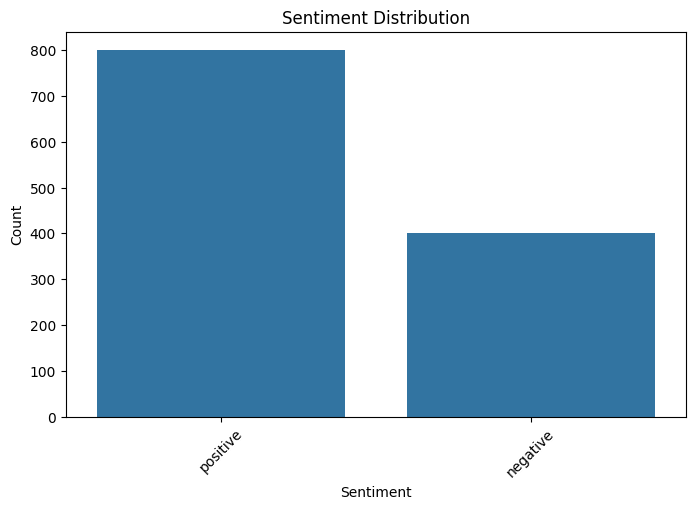

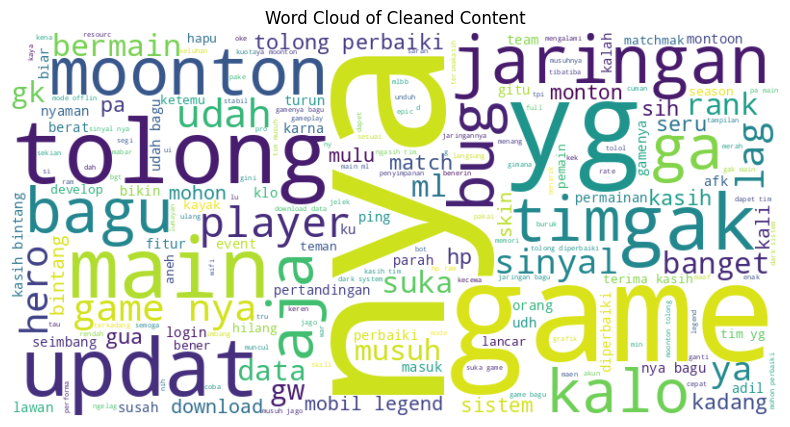

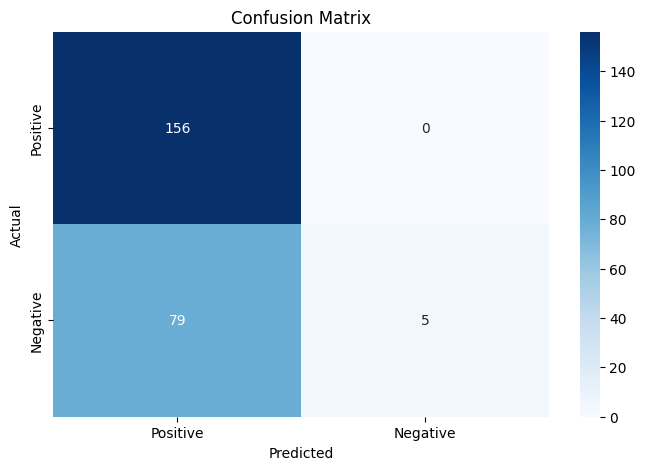

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

# Calculate and display percentages
total_reviews = len(df)
positive_percentage = (sentiment_counts.get('positive', 0) / total_reviews) * 100
negative_percentage = (sentiment_counts.get('negative', 0) / total_reviews) * 100

print(f"\nPercentage of Positive Sentiments: {positive_percentage:.2f}%")
print(f"Percentage of Negative Sentiments: {negative_percentage:.2f}%")

# Visualization of Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_content']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Content')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
